In [1]:
import time
import random
from dask import delayed
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import pandas as pd

In [2]:
from distributed import Client
client = Client()
client

<Client: scheduler='tcp://127.0.0.1:35634' processes=8 cores=8>

In [3]:
def gen_matrix(x):
    return np.random.rand(x,x)

def mult_py(A, B):
    m, n = A.shape
    p = B.shape[1]
    
    C = np.zeros((m,p))

    for i in range(0,m):
        for j in range(0,p):
            for k in range(0,n):
                C[i,j] += A[i,k]*B[k,j] 
    return C
mult_nb = nb.jit(nb.float64[:,:](nb.float64[:,:], nb.float64[:,:]), nopython = True)(mult_py)

def mult_np(x, y):
    return np.dot(x,y)

def timer(func, a, b):
    start = time.time()
    result = func(a, b)
    end = time.time()
    return end-start
        
dimension = range(1000,5000,1000)

output = []
for x in dimension:
    a = delayed(gen_matrix)(x)
    b = delayed(gen_matrix)(x)
    times = []
    for i in range(0,10,1):
        times.append(delayed(timer)(mult_np, a, b))
    avg_time = delayed(np.mean)(times)
    output.append((x, avg_time))

fig_data = delayed(sorted)(output)


In [4]:
# fig_data.visualize()

In [5]:
fig_data = fig_data.compute()

In [161]:
index = []
dataset = []
for idx, data in fig_data:
    index.append(idx)
    dataset.append(data)
fig_data = pd.DataFrame(dataset, index=index)

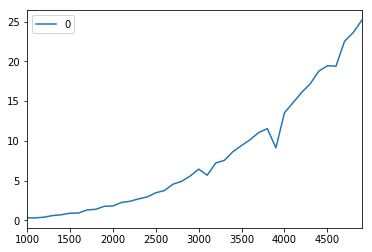

In [162]:
%matplotlib inline
fig_data.plot()

'gen_matrix'